# Chapter 6 - Other Popular Machine Learning Methods
## Segment 2 - A neural network with a Perceptron

### Background 
    used as a classifier in this case 

In [1]:
import numpy as np
import pandas as pd
import sklearn

from pandas import Series, DataFrame
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
from sklearn.linear_model import Perceptron 

In [14]:
from matplotlib import pyplot as plt

In [4]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

X[0:10,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
#normalize the data
stdr = StandardScaler()
standardized_X_test = stdr.fit_transform(X_test)
standardized_X_train = stdr.fit_transform(X_train)

In [7]:
standardized_X_test[0:10]

array([[-0.18535346, -0.38983284,  0.35765639,  0.23929876],
       [-1.13472481,  0.81999321, -1.17515672, -1.29905041],
       [ 0.35714446, -0.38983284,  0.75505238,  0.88027758],
       [ 1.30651582, -0.38983284,  0.86859409,  0.75208181],
       [-1.54159825,  0.01344251, -1.17515672, -1.17085464],
       [ 0.89964238, -0.18819516,  1.15244837,  0.88027758],
       [ 1.30651582,  0.21508019,  1.26599009,  1.77764792],
       [ 0.62839342, -2.00293424,  0.58473982,  0.49569029],
       [-0.99910033, -2.40620959,  0.01703126, -0.14528853],
       [-0.72785137,  0.61835554, -1.11838586, -1.17085464]])

### Train the model

In [11]:
#create the perceptron model obj
#with parameters: max learning time = 50, learnign rate = 0.15
perc = Perceptron(max_iter =50, eta0 = 0.15, tol = 1e-3, random_state = 15)
#eta0 is the learning rate 
#tol is the tolerance 
perc.fit(standardized_X_train, y_train.ravel())
#ravel() function returns a continuous flattened 1D array

Perceptron(eta0=0.15, max_iter=50, random_state=15)

### Make prediction using the model

In [13]:
y_pred = perc.predict(standardized_X_test)

In [11]:
print(y_test)

[1 0 2 1 0 0 2 0 2 2 1 0 0 2 2 0 1 1 0 2 1 0 2 1 1 1 1 1 1 0]


In [12]:
print(y_pred)

[2 0 2 2 0 0 2 0 2 2 0 0 0 2 2 0 0 2 0 2 1 0 2 1 1 0 0 0 1 0]


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       1.00      0.33      0.50        12
           2       0.73      1.00      0.84         8

    accuracy                           0.73        30
   macro avg       0.80      0.78      0.71        30
weighted avg       0.82      0.73      0.69        30



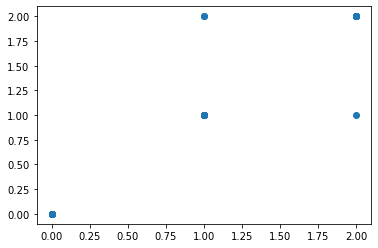

In [16]:
plt.scatter(x = y_pred, y = y_test)